<a href="https://colab.research.google.com/github/AlcoholWolf/PY-SAVE/blob/main/ch01_01_DNN%EA%B8%B0%EC%B4%88_%EA%B8%B0%EB%B3%B8%EB%A0%88%EC%9D%B4%EC%96%B4_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. DNN기초 - 기본 레이어
---
* 날짜:
* 이름:

## 학습내용
    - 딥러닝을 구성하는 레이어에 대해 이해한다.
    - 활성화 함수 종류를 구현하고 특징을 정리한다.
    - 그래디언트 소실에 대해 이해한다.

## 학습자료


- 케라스 창시자에게 배우는 딥러닝


In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 선형 함수 (Linear)
---

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-07.png?raw=true width=700>



### **| 모델 생성**

In [2]:
class LinearLayer():
    # Learn Param(w, b).shape
    def __init__(self, d_in, d_out):
        W_shape = (d_in, d_out)
        B_shape = (d_out)

        self.W = np.random.normal(0, 1, W_shape)
        self.B = np.zeros(B_shape)

    def forward(self, X):
        # X : (n_sample, d_in)
        return X@self.W+self.B

layer_1 = LinearLayer(d_in=3, d_out=3)
layer_2 = LinearLayer(d_in=3, d_out=2)

print(layer_1.W, layer_1.B)
print(layer_2.W, layer_2.B)

X = np.array([[1,2,1]])
print(f'X : {X}  Shape : {X.shape}')
print(f'Layer_1 : {layer_1.forward(X)}')
print(f'Layer_2 : {layer_2.forward(layer_1.forward(X))}')

[[-1.8154199   0.35562507 -0.85688813]
 [-0.92703723  0.45876077 -1.26297284]
 [ 1.13362841  0.73891367  1.10670021]] [0. 0. 0.]
[[ 0.14085322 -0.81398683]
 [ 0.05049195  1.1632306 ]
 [ 1.40832077  0.53146845]] [0. 0.]
X : [[1 2 1]]  Shape : (1, 3)
Layer_1 : [[-2.53586595  2.01206028 -2.2761336 ]]
Layer_2 : [[-3.46111828  3.19495838]]


* 모델 불러오기

In [3]:
class Model():
    def __init__(self):
        self.layer_1 = LinearLayer(d_in=3, d_out=3)
        self.layer_2 = LinearLayer(d_in=3, d_out=2)
    
    def predict(self, x):
        z = self.layer_1.forward(x)
        y = self.layer_2.forward(z)
        return y
    
    # 파라미터 반환
    def get_weights(self):
        return [self.layer_1.W, self.layer_2.W, self.layer_1.B, self.layer_2.B]

    # 파라미터 지정
    def set_weights(self, new_weight_list):
        self.layer_1.W = new_weight_list[0]
        self.layer_2.W = new_weight_list[1]
        self.layer_1.B = new_weight_list[2]
        self.layer_2.B = new_weight_list[3]

In [4]:
model = Model()
model.predict(X)

array([[1.71147841, 3.40814372]])

### **| 순전파 계산**

데이터와 학습파라미터의 값이 아래와 같을 때 Y값을 구하세요.

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-11.png?raw=true width=800>
</p>

* 파라미터 정의

In [5]:
X = np.array([[1,2,1]])
W1 = np.array([[1,1,-1,1,0.5,-1,1,1,1]]).reshape(3,3)
W2 = np.array([[1,0.5,-1,0.5,0,1]]).reshape(3,2)
B1 = np.array([[0,0,0]]).reshape(1,3)
B2 = np.array([[1, -0.5]]).reshape(1,2)
print(f'W1 : {W1}')
print(f'W2 : {W2}')
print(f'B1 : {B1}')
print(f'B2 : {B2}')

W1 : [[ 1.   1.  -1. ]
 [ 1.   0.5 -1. ]
 [ 1.   1.   1. ]]
W2 : [[ 1.   0.5]
 [-1.   0.5]
 [ 0.   1. ]]
B1 : [[0 0 0]]
B2 : [[ 1.  -0.5]]


* 학습 파라미터 확인

In [6]:
model.set_weights([W1, W2, B1, B2])
model.get_weights()

[array([[ 1. ,  1. , -1. ],
        [ 1. ,  0.5, -1. ],
        [ 1. ,  1. ,  1. ]]), array([[ 1. ,  0.5],
        [-1. ,  0.5],
        [ 0. ,  1. ]]), array([[0, 0, 0]]), array([[ 1. , -0.5]])]

* 예측 (순전파)

In [7]:
model.predict(X)

array([[2., 1.]])

* 학습 파라미터 세팅

In [8]:
# asd

## 활성 함수 (Activation)
---

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-08.png?raw=true width=800>

* 비선형 함수를 사용하는 이유

> 선형함수인 $h(x)=cx$를 활성화함수로 사용한 3층 네트워크를 떠올려 보세요.
이를 식으로 나타내면 $y(x)=h(h(h(x)))$가 됩니다. 이는 실은 $y(x)=ax$와 똑같은 식입니다.
$a=c3$이라고만 하면 끝이죠. 즉, 은닉층이 없는 네트워크로 표현할 수 있습니다.
뉴럴네트워크에서 층을 쌓는 혜택을 얻고 싶다면 활성화함수로는 반드시 비선형 함수를 사용해야 합니다. **출처: [밑바닥부터 시작하는 딥러닝]**
 
* 어떤 활성화 함수를 써야할까

> ELU → LeakyReLU → ReLU → tanh → sigmoid 순으로 사용하라는 얘기도 있고, cs231n 강의에서는 ReLU를 먼저 쓰고 , 그다음으로 LeakyReLU나 ELU 같은 ReLU Family를 쓰며, sigmoid는 사용하지 말라고 하고 있다.
**출처: https://excelsior-cjh.tistory.com/177 [EXCELSIOR:티스토리]**

* 딥러닝에서 사용되는 활성화 함수의 종류

```
- Step Function
- Sigmoid
- Softmax
- Tanh
- ReLU
- Leaky ReLU
- PReLU
- ELU
```


* 시각화를 위한 플롯팅 함수

In [9]:
plt.rcParams['figure.figsize'] = (8, 2)
def plot_func(xs, ys, title=''):
  plt.plot(xs, ys)
  plt.title(title)
  plt.ylim(-1, 2)
  plt.hlines(xmin=-5, xmax=5, y=0, colors='r', linestyles=':')
  plt.grid()

### **| Sigmoid**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-15.png?raw=true width=500>





* 구현
\begin{align}
sigmoid(x) = \frac{1}{1+e^{-x}}
\end{align}


In [10]:
def sigmoid(x):
    return 1/(1+np.exp(-x))
sigmoid(0)

0.5

* 미분
\begin{align}
\frac{d}{dx} sigmoid(x) = sigmoid(x)(1-sigmoid(x))
\end{align}


In [11]:
def sigmoid_grad(x):
    return sigmoid(x)*(1-sigmoid(x))
sigmoid_grad(2)

0.10499358540350662

* 시각화

In [12]:
plt.style.use('dark_background')

In [13]:
import warnings                                     # 경고 제거
warnings.filterwarnings(action='ignore')

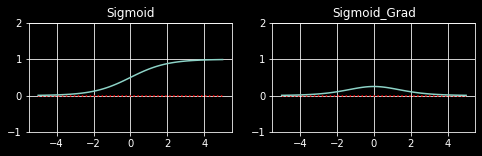

In [14]:
xs = np.linspace(-5,5,100)
plt.subplot(121);plot_func(xs, sigmoid(xs), title='Sigmoid')
plt.subplot(122);plot_func(xs, sigmoid_grad(xs), title='Sigmoid_Grad')



**Sigmoid 소개**

```
- # 나오게 된 배경
- # 기본적인거
- # 특징 정리 (출력 범위, 미분 값 등 )
```


### **| Softmax**

<p align='center'>
<img src=https://github.com/yebiny/SkillTreePython-DeepLearning/blob/main/imgs/ch0101-16.png?raw=true width=550>


* 구현

\begin{align}
softmax(x) = \frac{e^{x_i}}{\sum_je^{x_j}}
\end{align}

In [15]:
def softmax(xs):
    exs = np.exp(xs)
    sum_exs = np.sum(exs)
    return exs / sum_exs

# 아웃의 요소값은 0~1이며, 다 더하면 1이 됨

In [32]:
np.sum(softmax(np.array([1,2,1,1]))) # ?

1.0000000000000002

* 미분


\begin{align}
\frac{x}{dx} Softmax(\vec{x}) =  
\begin{cases}
& Softmax(\vec{x})(1-Softmax(\vec{x})) \;\;\;\;\;\;\; \text{ if } i=j  
\\ & 0 \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ if } i\neq j 
\end{cases}
\end{align}

In [17]:
# i : 예측 클래스
# j : 실제 클래스

In [18]:
def softmax_grad(xs, j=0):
    return (softmax(xs)*(1-softmax(xs)))[j]

In [19]:
softmax_grad(np.array([0.7,0.2,1]))

0.223837075668383

* 시각화


In [20]:
import pandas as pd

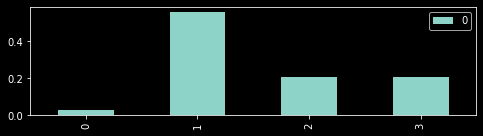

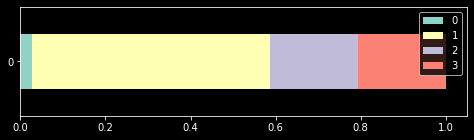

In [21]:
ys = softmax(np.array([-1,2,1,1]))
pd.DataFrame(ys).plot(kind='bar')
pd.DataFrame([ys]).plot(kind='barh', stacked=True)


**Softmax 소개**

```
- # 나오게 된 배경
- # 확률값 구하기
- # 0~1 출력
```


### **| Tanh**



* 구현

\begin{align}
tanh(x) = \frac{e^x - e^{-x}}{e^{x}+e^{-x}}
\end{align}

In [22]:
def tanh(x):
    return 2*sigmoid(2*x)

In [23]:
tanh(2)

1.964027580075817

* 미분


\begin{align}
\frac{d}{dx} tanh(x) = (1-tanh(x))(1+tanh(x))) = 1-tanh(x)^2
\end{align}

In [24]:
def tanh_grad(x):
    return (1-tanh(2*x))*(1+tanh(2*x))

In [25]:
tanh_grad(2)

-2.997317648795109

* 시각화

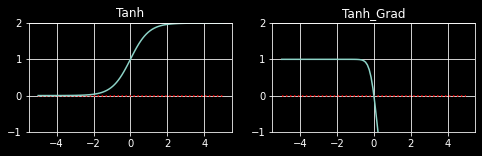

In [30]:
hs = np.linspace(-5,5,100)
plt.subplot(121);plot_func(hs, tanh(hs), title='Tanh')
plt.subplot(122);plot_func(hs, tanh_grad(hs), title='Tanh_Grad')


**Tanh 소개**

```
- # 나오게 된 배경
- # 몰루
- # 특징 정리 (출력 범위, 미분 값 등 )
```



### **| ReLU**


* 구현

\begin{align}
ReLU(x) = max(0, x)
\end{align}

In [46]:
def relu(x):
    if 0<=x: 
        return x
    else: 
        return 0

In [47]:
relu(np.linspace(-5,5,100))

ValueError: ignored

* 미분


\begin{align}
\frac{x}{dx} ReLU(x) =  
\begin{cases}
& 1 \;\; \text{ if } x \geq 0  
\\ & 0 \;\; \text{ if } x <0  
\end{cases}
\end{align}


In [42]:
def relu_grad(x):
    if 0<=x: return 1
    else: return 0

* 시각화



**ReLU 소개**

```
- # 나오게 된 배경
- # 장단점
- # 특징 정리 (출력 범위, 미분 값 등 )
```



### **| LeackyReLU & PReLU**



* 구현

\begin{align}
LeackyReLU(x) = max(0.01  x, x)
\\
\\
\end{align}



\begin{align}
PReLU(x;\alpha) = max(\alpha  x, x)
\end{align}

* 미분

\begin{align}
\frac{x}{dx} PReLU(x;\alpha) =  
\begin{cases}
& 1 \;\; \text{ if } x \geq 0  
\\ & \alpha \;\; \text{ if } x <0  
\end{cases}
\end{align}

* 시각화
  * $\alpha$ 값이 각각 0.01, 0.1, 0.2 일때 플롯을 그리세요.



**LeackReLU및 PReLU 소개**

```
- # 나오게 된 배경
- # 장단점
- # 특징 정리 (출력 범위, 미분 값 등 )
- # 알파 값은 보통 어떻게 정해지는가?
```



### **| ELU & SELU**


\begin{align}
ELU(x) =
\begin{cases}
& x \;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ if } x \geq 0  
\\ & (e^x-1) \;\;\;\;\;\; \text{ if } x <0  
\end{cases}
\\
\\
\end{align}



\begin{align}
SELU(x;\alpha) =
\begin{cases}
& x \;\;\;\;\;\;\;\;\;\;\;\;\;\;\; \text{ if } x \geq 0  
\\ & \alpha(e^x-1) \;\; \text{ if } x <0  
\end{cases}
\end{align}

* 구현

* 미분

\begin{align}
\frac{x}{dx} ELU(x;\alpha) =  
\begin{cases}
& 1 \;\;\;\;\;\; \text{ if } x \geq 0  
\\ & \alpha e^{x} \;\; \text{ if } x <0  
\end{cases}
\end{align}

* 시각화
  * $\alpha$ 값이 각각 0.1, 1, 2 일때 플롯을 그리세요.



**ELU 및 ReLU 소개**

```
- # 나오게 된 배경
- # 장단점
- # 특징 정리 (출력 범위, 미분 값 등 )
- # 알파 값은 보통 어떻게 정해지는가?
```



## 그래디언트 소실 (Vaniching Gradient)
---
다음 질문에 답할 수 있도록 내용을 정리하세요.

1. 그래디언트 소실 개념
2. 딥러닝에서 그래디언트 값이 중요한 이유
3. 그래디언트 소실을 방지하기 위한 딥러닝 기법

```


```